In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
def conv(kernel, func):
    result = np.zeros(len(func))
    K = np.flip(kernel, 0)
    for i in range(len(func)):
        result[i] = np.sum(func * np.roll(K, i + 1))
    return result

In [3]:
f_0 = 300
mu = 8e5
a = 0
b = 1e-2
N = 100
t_ax = np.linspace(a,b,N)

x_t = lambda t : np.cos(2 * np.pi * f_0 * t + mu * t**2)
x_ar = x_t(t_ax)

beta_0 = 3e3
A = 0.5
dt = 2e-3

kernel = lambda t, beta : np.exp(- beta * t) + A * np.exp(- beta * t - dt)

kernel_ar = kernel(t_ax, beta_0)

In [4]:
right_part = conv(kernel_ar, x_t(t_ax))
kernel_fft = np.fft.fft(kernel_ar)
m_omega = lambda omega: omega ** 2 + 1e-4
freq_ax = np.fft.fftfreq(len(t_ax), t_ax[1] - t_ax[0])
m_ar = m_omega(freq_ax)

In [5]:
#generate kernel as matrix
kernel_matr = np.zeros((len(t_ax), len(t_ax)))
ker_flip = np.flip(kernel_ar, 0)
for i in range(len(t_ax)):
    kernel_matr[i] = np.roll(ker_flip, i + 1)
eig_vals = np.linalg.eigvals(kernel_matr)
eig_max = np.max(np.abs(eig_vals))

alpha_max = 2 / eig_max
print(alpha_max)

0.3487966788513514


In [6]:
# i = 0
# alpha = 0.05
# MAX_ITER = 100
sigma = 1e-1
noise = np.random.normal(0, sigma)
right_noisy = right_part + noise
# iter_sol = right_noisy
# res_norm = np.linalg.norm(iter_sol)
# eps = 1e-1
# true_res = np.zeros(MAX_ITER)
# while i < MAX_ITER and res_norm > eps:
#     iter_sol += alpha * (right_noisy - np.dot(kernel_matr, iter_sol))
#     true_res[i] = (np.linalg.norm(x_ar - iter_sol) / np.linalg.norm(x_ar))**2
#     res_norm = true_res[i]
#     i += 1
# print(i)

In [7]:
# plt.plot(np.arange(i), true_res[:i])

In [8]:
def exp(x_ar, alpha, right_noisy, MAX_ITER = 100):
    iter_solution = right_noisy
    res_norm = np.linalg.norm(iter_solution)
    eps = 1e-5
    true_residual = np.zeros(MAX_ITER)
    i = 0
    while i < MAX_ITER and res_norm > eps:
        iter_solution += alpha * (right_noisy - np.dot(kernel_matr, iter_solution))
        true_residual[i] = (np.linalg.norm(x_ar - iter_solution) / np.linalg.norm(x_ar))**2
        res_norm = np.sqrt(true_residual[i])
        i += 1
    return true_residual, i

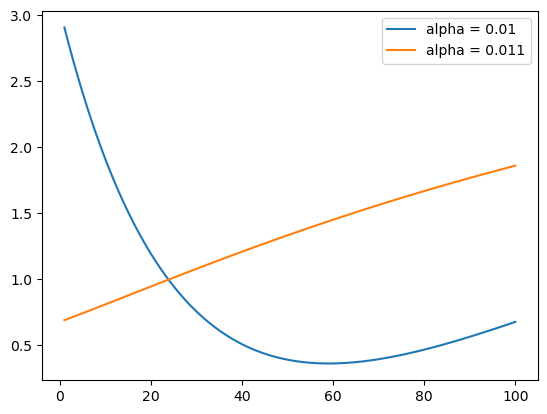

In [9]:
alpha_range = [0.01, 0.011]

for alpha in alpha_range:
    func, i = exp(x_ar, alpha, right_noisy)
    plt.plot(np.arange(1, i +1), func[:i], label = f'alpha = {alpha}')
plt.legend()